In [ ]:
### First Half of Training Model Adpot from: https://www.kaggle.com/code/yldrmmahmud/98-16-accuracy-sms-spam-detection

In [116]:
import numpy as np        
import pandas as pd       
import matplotlib.pyplot as plt
%matplotlib inline

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords

nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [117]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [120]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [122]:
  # Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [123]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [125]:
#checking missing values
print(df.isnull().sum())
#check duplicate values
print(df.duplicated().sum())

target    0
text      0
dtype: int64

In [127]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [128]:
df.shape

(5169, 2)

In [129]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


In [131]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [132]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [133]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [134]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [138]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.264198,0.267602
num_characters,0.384717,1.000000,0.965307,0.626118
num_words,0.264198,0.965307,1.000000,0.683561
num_sentence,0.267602,0.626118,0.683561,1.000000


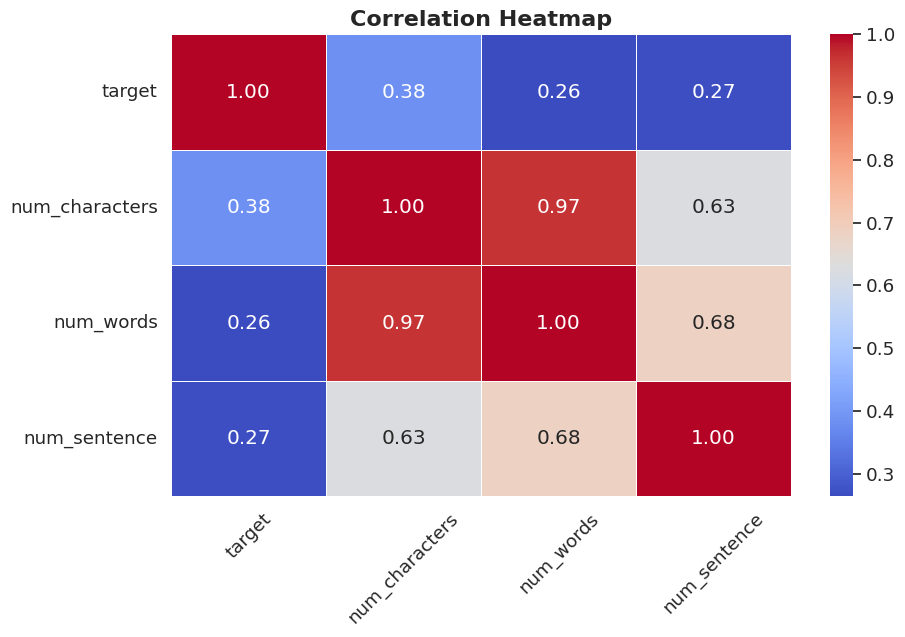

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()


In [140]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)


In [141]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [142]:
df['transformed_text'] = df['text'].apply(transform_text)

In [146]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [147]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

In [149]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [150]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

In [152]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [153]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [156]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)


    

In [157]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

In [158]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [159]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    


For:  SVC
Accuracy:  0.9748549323017408
Precision:  0.9666666666666667

For:  KNN
Accuracy:  0.9052224371373307
Precision:  1.0

For:  NB
Accuracy:  0.9729206963249516
Precision:  1.0

For:  DT
Accuracy:  0.9303675048355899
Precision:  0.84375

For:  LR
Accuracy:  0.9574468085106383
Precision:  0.9519230769230769

For:  RF
Accuracy:  0.971953578336557
Precision:  0.9739130434782609

For:  Adaboost
Accuracy:  0.9642166344294004
Precision:  0.9316239316239316

For:  Bgc
Accuracy:  0.9545454545454546
Precision:  0.8527131782945736

For:  ETC
Accuracy:  0.9777562862669246
Precision:  0.9831932773109243

For:  GBDT
Accuracy:  0.9487427466150871
Precision:  0.9292929292929293

For:  xgb
Accuracy:  0.9690522243713733
Precision:  0.9416666666666667



For:  SVC
Accuracy:  0.9748549323017408
Precision:  0.9666666666666667

For:  KNN
Accuracy:  0.9052224371373307
Precision:  1.0

For:  NB
Accuracy:  0.9729206963249516
Precision:  1.0

For:  DT
Accuracy:  0.9342359767891683
Precision:  0.85

For:  LR
Accuracy:  0.9574468085106383
Precision:  0.9519230769230769

For:  RF
Accuracy:  0.971953578336557
Precision:  0.9739130434782609

For:  Adaboost
Accuracy:  0.9642166344294004
Precision:  0.9316239316239316

For:  Bgc
Accuracy:  0.9545454545454546
Precision:  0.8527131782945736

For:  ETC
Accuracy:  0.9777562862669246
Precision:  0.9831932773109243

For:  GBDT
Accuracy:  0.9487427466150871
Precision:  0.9292929292929293

For:  xgb
Accuracy:  0.9690522243713733
Precision:  0.9416666666666667

MODEL PERFORMANCE SUMMARY
   Model  Accuracy  Precision
     ETC  0.977756   0.983193
     SVC  0.974855   0.966667
      NB  0.972921   1.000000
      RF  0.971954   0.973913
     xgb  0.969052   0.941667
Adaboost  0.964217   0.931624
      LR  0.95

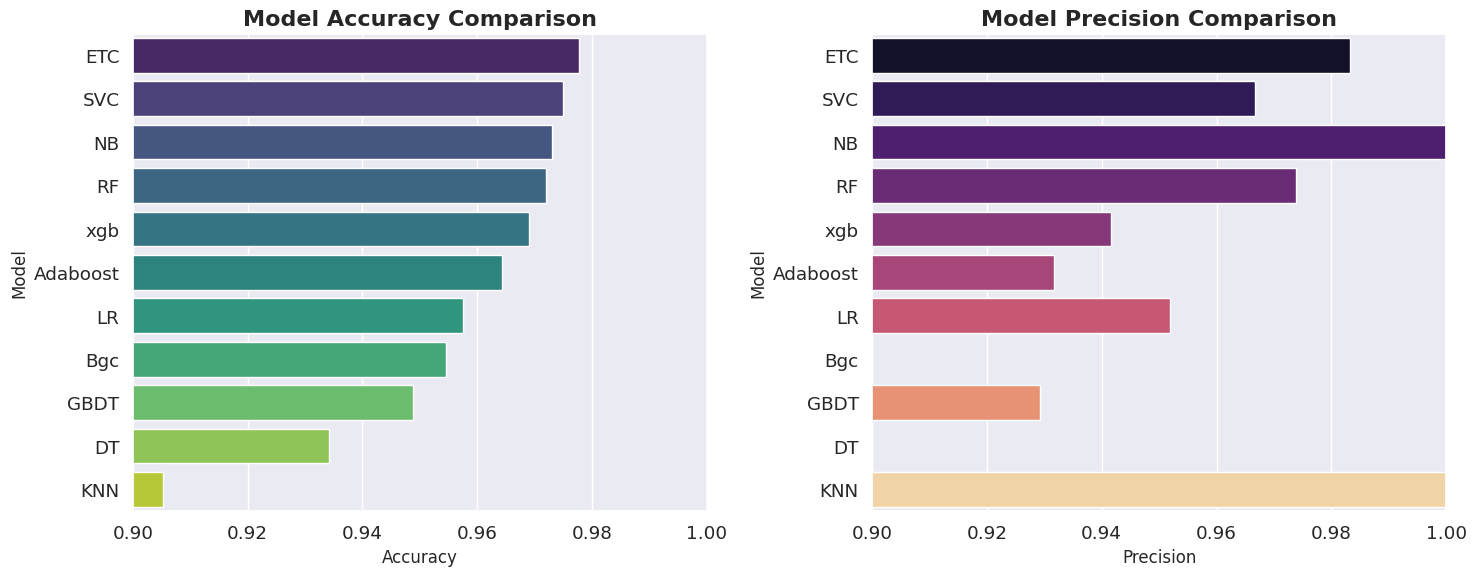


TOP 3 MODELS BY ACCURACY
Model  Accuracy  Precision
  ETC  0.977756   0.983193
  SVC  0.974855   0.966667
   NB  0.972921   1.000000

Creating ensemble with: ETC, SVC, NB

Training ensemble model...

ENSEMBLE MODEL PERFORMANCE
Accuracy:  0.9797
Precision: 0.9756

FINAL COMPARISON (Including Ensemble)
           Model  Accuracy  Precision
Ensemble (Top 3)  0.979691   0.975610
             ETC  0.977756   0.983193
             SVC  0.974855   0.966667
              NB  0.972921   1.000000
              RF  0.971954   0.973913
             xgb  0.969052   0.941667
        Adaboost  0.964217   0.931624
              LR  0.957447   0.951923
             Bgc  0.954545   0.852713
            GBDT  0.948743   0.929293
              DT  0.934236   0.850000
             KNN  0.905222   1.000000


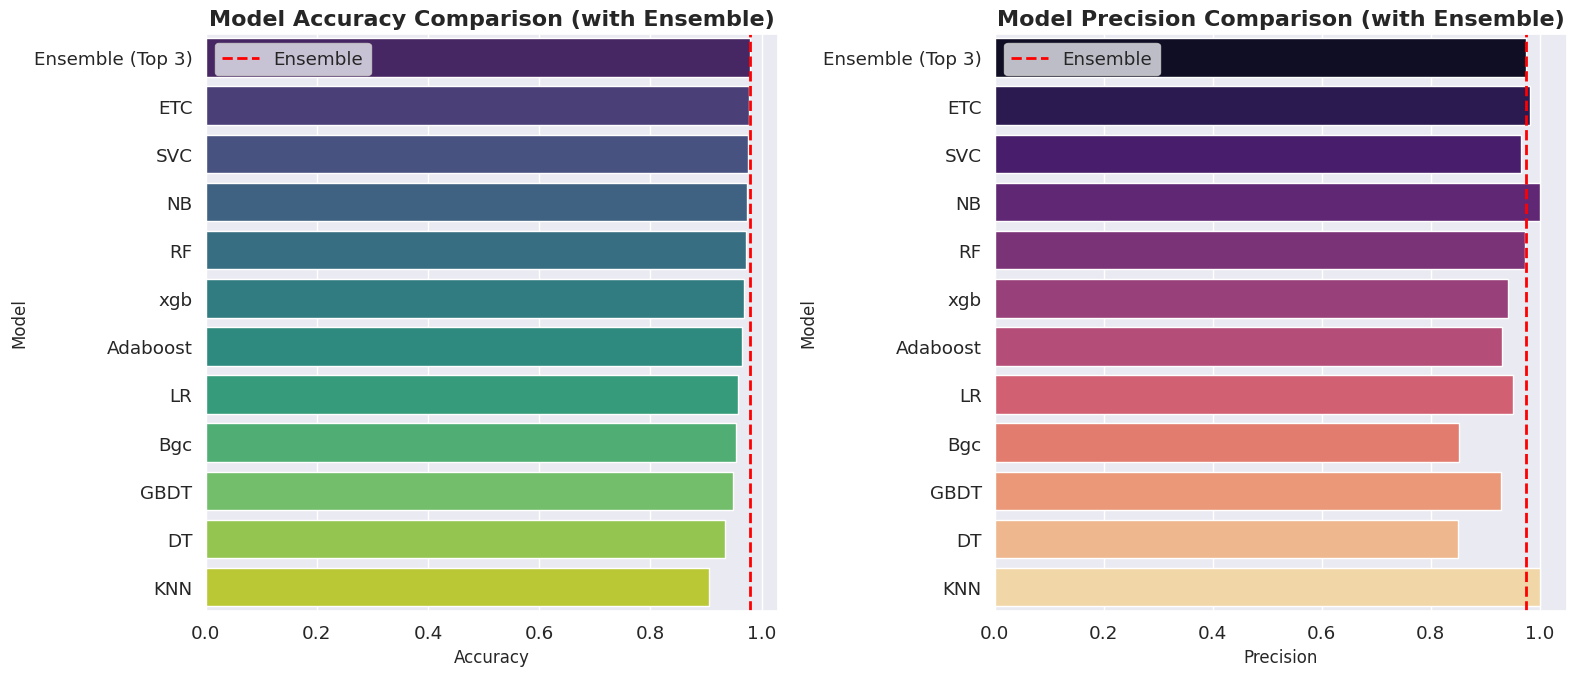

In [160]:
# First, recreate the classifiers dictionary (it was overwritten in your previous loop)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Recreate all classifier instances
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

# Recreate the dictionary
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

# Train all classifiers and collect scores
accuracy_scores = []
precision_scores = []
model_names = []

# Use 'clf' instead of 'clfs' to avoid overwriting the dictionary
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    model_names.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

# Create a performance DataFrame for better visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

# Sort by accuracy to identify top 3 models
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(performance_df.to_string(index=False))

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
sns.barplot(data=performance_df, x='Accuracy', y='Model', palette='viridis', ax=axes[0])
axes[0].set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)
axes[0].set_xlim([0.9, 1.0])  # Adjust based on your scores

# Precision comparison
sns.barplot(data=performance_df, x='Precision', y='Model', palette='magma', ax=axes[1])
axes[1].set_title('Model Precision Comparison', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Precision', fontsize=12)
axes[1].set_ylabel('Model', fontsize=12)
axes[1].set_xlim([0.9, 1.0])  # Adjust based on your scores

plt.tight_layout()
plt.show()

# Display top 3 models
print("\n" + "="*50)
print("TOP 3 MODELS BY ACCURACY")
print("="*50)
print(performance_df.head(3).to_string(index=False))

# Create an ensemble of the top 3 models
from sklearn.ensemble import VotingClassifier

# Get the top 3 model names
top_3_models = performance_df.head(3)['Model'].tolist()
print("\n" + "="*50)
print(f"Creating ensemble with: {', '.join(top_3_models)}")
print("="*50)

# Recreate fresh instances of the top 3 models for the ensemble
top_3_classifiers = []
for model_name in top_3_models:
    if model_name == 'SVC':
        top_3_classifiers.append(('SVC', SVC(kernel="sigmoid", gamma=1.0, probability=True)))
    elif model_name == 'KNN':
        top_3_classifiers.append(('KNN', KNeighborsClassifier()))
    elif model_name == 'NB':
        top_3_classifiers.append(('NB', MultinomialNB()))
    elif model_name == 'DT':
        top_3_classifiers.append(('DT', DecisionTreeClassifier(max_depth=5)))
    elif model_name == 'LR':
        top_3_classifiers.append(('LR', LogisticRegression(solver='liblinear', penalty='l1')))
    elif model_name == 'RF':
        top_3_classifiers.append(('RF', RandomForestClassifier(n_estimators=50, random_state=2)))
    elif model_name == 'Adaboost':
        top_3_classifiers.append(('Adaboost', AdaBoostClassifier(n_estimators=50, random_state=2)))
    elif model_name == 'Bgc':
        top_3_classifiers.append(('Bgc', BaggingClassifier(n_estimators=50, random_state=2)))
    elif model_name == 'ETC':
        top_3_classifiers.append(('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)))
    elif model_name == 'GBDT':
        top_3_classifiers.append(('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)))
    elif model_name == 'xgb':
        top_3_classifiers.append(('xgb', XGBClassifier(n_estimators=50, random_state=2)))

# Create voting ensemble (soft voting for probability-based voting)
ensemble = VotingClassifier(estimators=top_3_classifiers, voting='soft')

# Train the ensemble
print("\nTraining ensemble model...")
ensemble.fit(X_train, y_train)

# Evaluate the ensemble
y_pred_ensemble = ensemble.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
ensemble_precision = precision_score(y_test, y_pred_ensemble)

print("\n" + "="*50)
print("ENSEMBLE MODEL PERFORMANCE")
print("="*50)
print(f"Accuracy:  {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")

# Compare ensemble with individual models
comparison_df = pd.DataFrame({
    'Model': model_names + ['Ensemble (Top 3)'],
    'Accuracy': accuracy_scores + [ensemble_accuracy],
    'Precision': precision_scores + [ensemble_precision]
})
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

print("\n" + "="*50)
print("FINAL COMPARISON (Including Ensemble)")
print("="*50)
print(comparison_df.to_string(index=False))

# Visualize final comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Accuracy comparison
sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis', ax=axes[0])
axes[0].set_title('Model Accuracy Comparison (with Ensemble)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_ylabel('Model', fontsize=12)
axes[0].axvline(x=ensemble_accuracy, color='red', linestyle='--', linewidth=2, label='Ensemble')
axes[0].legend()

# Precision comparison
sns.barplot(data=comparison_df, x='Precision', y='Model', palette='magma', ax=axes[1])
axes[1].set_title('Model Precision Comparison (with Ensemble)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Precision', fontsize=12)
axes[1].set_ylabel('Model', fontsize=12)
axes[1].axvline(x=ensemble_precision, color='red', linestyle='--', linewidth=2, label='Ensemble')
axes[1].legend()

plt.tight_layout()
plt.show()

### Extract the top 3 Models/Classifiers and Ensemble them with TFIDF Vectorizer

In [161]:
ensemble

VotingClassifier(estimators=[('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NB', MultinomialNB())],
                 voting='soft')

In [48]:
from joblib import dump

ensemble_path = "/kaggle/working/ensemble_top3.joblib"
dump(ensemble, ensemble_path)

print(f"Saved ensemble to {ensemble_path}")

Saved ensemble to /kaggle/working/ensemble_top3.joblib


In [49]:
with open("/kaggle/input/enron-email-dataset/emails.csv", "r") as f:
    for i in range(10):
        print(repr(f.readline()))

'"file","message"\n'
'"allen-p/_sent_mail/1.","Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\n'
'Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)\n'
'From: phillip.allen@enron.com\n'
'To: tim.belden@enron.com\n'
'Subject: \n'
'Mime-Version: 1.0\n'
'Content-Type: text/plain; charset=us-ascii\n'
'Content-Transfer-Encoding: 7bit\n'
'X-From: Phillip K Allen\n'


In [51]:
import re
def iter_email_batches(path, batch_size=5000):
    row_start = re.compile(r'^"[^"]+","')
    records = []
    current_file = None
    current_msg_lines = []

    with open(path, "r", encoding="utf-8", errors="replace") as f:
        f.readline()  # skip header

        for line in f:
            if row_start.match(line):
                if current_file is not None:
                    records.append({"file": current_file, "message": "".join(current_msg_lines)})

                first_comma = line.find('","')
                current_file = line[1:first_comma]
                current_msg_lines = [line[first_comma + 3:]]

                if len(records) >= batch_size:
                    yield pd.DataFrame(records)
                    records = []
            else:
                if current_file is not None:
                    current_msg_lines.append(line)

    if current_file is not None:
        records.append({"file": current_file, "message": "".join(current_msg_lines)})

    if records:
        yield pd.DataFrame(records)

# usage:
path = "/kaggle/input/enron-email-dataset/emails.csv"
dfs = []
for df_chunk in iter_email_batches(path, batch_size=5000):
    dfs.append(df_chunk)

df_email = pd.concat(dfs, ignore_index=True)
df_email

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [162]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("tfidf", tfid),
    ("model", ensemble)
])

In [163]:
pipe.fit(df["transformed_text"], y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('model',
                 VotingClassifier(estimators=[('ETC',
                                               ExtraTreesClassifier(n_estimators=50,
                                                                    random_state=2)),
                                              ('SVC',
                                               SVC(gamma=1.0, kernel='sigmoid',
                                                   probability=True)),
                                              ('NB', MultinomialNB())],
                                  voting='soft'))])

In [164]:
import time
def predict_with_progress(pipe, texts, batch_size=5000):
    n = len(texts)
    preds = []
    confs = []

    start_time = time.time()

    for i in range(0, n, batch_size):
        batch_start = time.time()

        batch = texts.iloc[i:i+batch_size]
        p = pipe.predict(batch)
        prob = pipe.predict_proba(batch).max(axis=1)

        preds.extend(p)
        confs.extend(prob)

        elapsed = time.time() - start_time
        avg_time_per_row = elapsed / (i + len(batch))
        remaining = avg_time_per_row * (n - (i + len(batch)))

        print(
            f"[{i + len(batch):>7}/{n}] "
            f"Elapsed: {elapsed:6.1f}s | "
            f"ETA: {remaining:6.1f}s"
        )

    return np.array(preds), np.array(confs)

In [ ]:
preds, probs = predict_with_progress(
    pipe,
    df_email["message"].astype(str),
    batch_size=5000
)

df_email["prediction"] = preds
df_email["confidence"] = probs

[   5000/517401] Elapsed:    3.8s | ETA:  386.1s
[  10000/517401] Elapsed:    8.8s | ETA:  446.8s
[  15000/517401] Elapsed:   13.7s | ETA:  457.9s
[  20000/517401] Elapsed:   19.1s | ETA:  474.4s
[  25000/517401] Elapsed:   23.5s | ETA:  463.8s
[  30000/517401] Elapsed:   28.2s | ETA:  458.9s
[  35000/517401] Elapsed:   33.0s | ETA:  454.9s
[  40000/517401] Elapsed:   37.3s | ETA:  444.8s
[  45000/517401] Elapsed:   42.2s | ETA:  443.0s
[  50000/517401] Elapsed:   47.2s | ETA:  441.2s
[  55000/517401] Elapsed:   52.6s | ETA:  442.1s
[  60000/517401] Elapsed:   60.9s | ETA:  463.9s
[  65000/517401] Elapsed:   68.2s | ETA:  474.9s
[  70000/517401] Elapsed:   76.0s | ETA:  486.1s
[  75000/517401] Elapsed:   86.1s | ETA:  508.1s
[  80000/517401] Elapsed:   93.3s | ETA:  510.0s
[  85000/517401] Elapsed:   98.0s | ETA:  498.6s
[  90000/517401] Elapsed:  103.5s | ETA:  491.6s
[  95000/517401] Elapsed:  108.1s | ETA:  480.6s
[ 100000/517401] Elapsed:  113.1s | ETA:  472.2s
[ 105000/517401] Ela

In [61]:
df_email['prediction'].value_counts() 

prediction
0    419197
1     98204
Name: count, dtype: int64

In [78]:
df_email_filter = df_email[df_email['prediction'] == 0]
df_email_filter.to_parquet("/kaggle/working/filter_emails.parquet", index = False)

In [83]:
from email.parser import Parser
from email.policy import default

def parse_enron_email(raw: str) -> dict:
    """
    Parses Enron-style raw email text into key headers + body.
    Works even if the email isn't perfectly formatted.
    """
    raw = "" if pd.isna(raw) else str(raw)

    # Try standard email parser first
    try:
        msg = Parser(policy=default).parsestr(raw)
        message_id = (msg.get("Message-ID") or "").strip()
        subject = (msg.get("Subject") or "").strip()
        from_ = (msg.get("From") or "").strip()
        to_ = (msg.get("To") or "").strip()
        cc_ = (msg.get("Cc") or "").strip()
        date_ = (msg.get("Date") or "").strip()
        in_reply_to = (msg.get("In-Reply-To") or "").strip()
        references = (msg.get("References") or "").strip()

        # Body extraction
        if msg.is_multipart():
            parts = []
            for part in msg.walk():
                ctype = part.get_content_type()
                if ctype == "text/plain":
                    try:
                        parts.append(part.get_content())
                    except Exception:
                        pass
            body = "\n".join(parts).strip()
        else:
            try:
                body = (msg.get_content() or "").strip()
            except Exception:
                body = ""

    except Exception:
        # Fallback: split on first blank line
        header, _, body = raw.partition("\n\n")
        def grab(hname):
            m = re.search(rf"^{hname}:\s*(.*)$", header, flags=re.MULTILINE | re.IGNORECASE)
            return (m.group(1).strip() if m else "")
        message_id = grab("Message-ID")
        subject = grab("Subject")
        from_ = grab("From")
        to_ = grab("To")
        cc_ = grab("Cc")
        date_ = grab("Date")
        in_reply_to = grab("In-Reply-To")
        references = grab("References")
        body = body.strip()

    return {
        "message_id": message_id,
        "subject": subject,
        "from": from_,
        "to": to_,
        "cc": cc_,
        "date_raw": date_,
        "in_reply_to": in_reply_to,
        "references": references,
        "body": body,
    }


In [84]:
from email.utils import parsedate_to_datetime

def safe_parse_date(s):
    try:
        return parsedate_to_datetime(s)
    except Exception:
        return pd.NaT

def normalize_subject(s: str) -> str:
    s = "" if pd.isna(s) else str(s).strip().lower()
    # Strip common prefixes repeatedly: re:, fw:, fwd:
    s = re.sub(r"^(\s*(re|fw|fwd)\s*:\s*)+", "", s).strip()
    return s

def get_root_id(row, msgid_set):
    """
    Determine root message-id for a message:
    - If References exists: root is first ID in References that exists in dataset (or first overall)
    - Else if In-Reply-To exists: follow chain if possible
    - Else: itself
    """
    mid = row["message_id"]

    # Parse References into list of ids like <...>
    refs = re.findall(r"<[^>]+>", row.get("references", "") or "")
    if refs:
        # Prefer a reference that exists in our dataset
        for r in refs:
            if r in msgid_set:
                return r
        return refs[0]

    irt = row.get("in_reply_to", "") or ""
    irt_ids = re.findall(r"<[^>]+>", irt)
    if irt_ids:
        # If parent exists, root is parent (or parent’s root later via union-find approach)
        parent = irt_ids[0]
        return parent if parent in msgid_set else parent

    return mid

In [9]:
from tqdm.auto import tqdm

tqdm.pandas()  # enables .progress_apply

def log_stage(msg):
    """Print a timestamped stage header and return start time."""
    ts = time.strftime("%Y-%m-%d %H:%M:%S")
    print(f"\n[{ts}] {msg}")
    return time.time()

def log_done(t0, msg="Done"):
    """Print elapsed time since t0."""
    elapsed = time.time() - t0
    ts = time.strftime("%Y-%m-%d %H:%M:%S")
    print(f"[{ts}] {msg} | elapsed: {elapsed:.2f}s")

In [89]:
def now_ts():
    return time.strftime("%Y-%m-%d %H:%M:%S")

def run_in_batches(series, func, batch_size=5000, label="task"):
    """
    Apply func to a pandas Series in batches with timestamp + batch timing + ETA.
    Returns a list of results aligned with the original Series order.
    """
    n = len(series)
    out = [None] * n
    t_start = time.time()

    print(f"[{now_ts()}] Starting {label} | n={n:,} | batch_size={batch_size:,}")

    for start in range(0, n, batch_size):
        t_batch = time.time()
        end = min(start + batch_size, n)

        # Apply
        batch_vals = series.iloc[start:end].tolist()
        batch_out = [func(x) for x in batch_vals]
        out[start:end] = batch_out

        # Timing / ETA
        batch_sec = time.time() - t_batch
        done = end
        elapsed = time.time() - t_start
        rate = done / elapsed if elapsed > 0 else float("inf")
        eta = (n - done) / rate if rate > 0 else float("inf")

        print(
            f"[{now_ts()}] {label}: {done:,}/{n:,} "
            f"| batch {start:,}-{end-1:,} took {batch_sec:.2f}s "
            f"| elapsed {elapsed:.1f}s | ETA {eta:.1f}s"
        )

    return out

# -----------------------------
# 1) Parse raw emails -> fields
# -----------------------------
t0 = time.time()
parsed_dicts = run_in_batches(
    df_email["message"].astype(str),
    parse_enron_email,
    batch_size=2000,         # parsing is heavier; smaller batch is smoother
    label="parse_enron_email"
)
parsed = pd.DataFrame(parsed_dicts)
print(f"[{now_ts()}] Parsed emails total time: {time.time() - t0:.2f}s")

# 2) Concat
t0 = time.time()
df2 = pd.concat([df_email.reset_index(drop=True), parsed.reset_index(drop=True)], axis=1)
print(f"[{now_ts()}] Concatenated df2 | elapsed {time.time() - t0:.2f}s")

# 3) Parse dates
t0 = time.time()
df2["date"] = run_in_batches(
    df2["date_raw"].fillna("").astype(str),
    safe_parse_date,
    batch_size=10000,
    label="safe_parse_date"
)
print(f"[{now_ts()}] Parsed dates total time: {time.time() - t0:.2f}s")

# 4) Normalize subjects
t0 = time.time()
df2["subject_norm"] = run_in_batches(
    df2["subject"].fillna("").astype(str),
    normalize_subject,
    batch_size=20000,
    label="normalize_subject"
)
print(f"[{now_ts()}] Normalized subjects total time: {time.time() - t0:.2f}s")

# 5) Fill missing Message-IDs
t0 = time.time()
missing_mid = df2["message_id"].eq("") | df2["message_id"].isna()
df2.loc[missing_mid, "message_id"] = "SURR_" + df2.loc[missing_mid].index.astype(str)
print(f"[{now_ts()}] Filled missing Message-IDs | elapsed {time.time() - t0:.2f}s")

# 6) msgid_set
t0 = time.time()
msgid_set = set(df2["message_id"].tolist())
print(f"[{now_ts()}] Built msgid_set | elapsed {time.time() - t0:.2f}s")

# 7) Compute thread_root_guess with batch timing
t0 = time.time()
refs_col = df2["references"].fillna("").astype(str).tolist()
irt_col  = df2["in_reply_to"].fillna("").astype(str).tolist()
mid_col  = df2["message_id"].astype(str).tolist()

n = len(df2)
thread_root = [None] * n
batch_size = 20000

print(f"[{now_ts()}] Starting thread_root_guess | n={n:,} | batch_size={batch_size:,}")

t_start = time.time()
for start in range(0, n, batch_size):
    t_batch = time.time()
    end = min(start + batch_size, n)

    for i in range(start, end):
        refs = re.findall(r"<[^>]+>", refs_col[i])
        if refs:
            chosen = None
            for r in refs:
                if r in msgid_set:
                    chosen = r
                    break
            thread_root[i] = chosen if chosen is not None else refs[0]
            continue

        irt_ids = re.findall(r"<[^>]+>", irt_col[i])
        if irt_ids:
            thread_root[i] = irt_ids[0]
            continue

        thread_root[i] = mid_col[i]

    # timing / ETA
    batch_sec = time.time() - t_batch
    done = end
    elapsed = time.time() - t_start
    rate = done / elapsed if elapsed > 0 else float("inf")
    eta = (n - done) / rate if rate > 0 else float("inf")

    print(
        f"[{now_ts()}] thread_root_guess: {done:,}/{n:,} "
        f"| batch {start:,}-{end-1:,} took {batch_sec:.2f}s "
        f"| elapsed {elapsed:.1f}s | ETA {eta:.1f}s"
    )

df2["thread_root_guess"] = thread_root
print(f"[{now_ts()}] Computed thread_root_guess total time: {time.time() - t0:.2f}s")

[2026-02-21 23:37:02] Starting parse_enron_email | n=517,401 | batch_size=2,000
[2026-02-21 23:37:05] parse_enron_email: 2,000/517,401 | batch 0-1,999 took 3.21s | elapsed 3.2s | ETA 828.1s
[2026-02-21 23:37:08] parse_enron_email: 4,000/517,401 | batch 2,000-3,999 took 2.98s | elapsed 6.2s | ETA 795.3s
[2026-02-21 23:37:13] parse_enron_email: 6,000/517,401 | batch 4,000-5,999 took 4.31s | elapsed 10.5s | ETA 895.3s
[2026-02-21 23:37:16] parse_enron_email: 8,000/517,401 | batch 6,000-7,999 took 3.15s | elapsed 13.7s | ETA 869.5s
[2026-02-21 23:37:20] parse_enron_email: 10,000/517,401 | batch 8,000-9,999 took 4.34s | elapsed 18.0s | ETA 913.1s
[2026-02-21 23:37:23] parse_enron_email: 12,000/517,401 | batch 10,000-11,999 took 3.10s | elapsed 21.1s | ETA 888.7s
[2026-02-21 23:37:27] parse_enron_email: 14,000/517,401 | batch 12,000-13,999 took 4.00s | elapsed 25.1s | ETA 902.4s
[2026-02-21 23:37:32] parse_enron_email: 16,000/517,401 | batch 14,000-15,999 took 4.62s | elapsed 29.7s | ETA 931

In [90]:
df2.head()

,file,message,prediction,confidence,message_id,subject,from,to,cc,date_raw,in_reply_to,references,body,date,subject_norm,thread_root_guess
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,0,0.640445,<18782981.1075855378110.JavaMail.evans@thyme>,,phillip.allen@enron.com,tim.belden@enron.com,,"Mon, 14 May 2001 16:39:00 -0700",,,"Here is our forecast\n\n """,2001-05-14 16:39:00-07:00,,<18782981.1075855378110.JavaMail.evans@thyme>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,0,0.889517,<15464986.1075855378456.JavaMail.evans@thyme>,Re:,phillip.allen@enron.com,john.lavorato@enron.com,,"Fri, 04 May 2001 13:51:00 -0700",,,Traveling to have a business meeting takes the...,2001-05-04 13:51:00-07:00,,<15464986.1075855378456.JavaMail.evans@thyme>
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,0,0.701112,<24216240.1075855687451.JavaMail.evans@thyme>,Re: test,phillip.allen@enron.com,leah.arsdall@enron.com,,"Wed, 18 Oct 2000 03:00:00 -0700",,,"test successful. way to go!!!""",2000-10-18 03:00:00-07:00,test,<24216240.1075855687451.JavaMail.evans@thyme>
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,0,0.759043,<13505866.1075863688222.JavaMail.evans@thyme>,,phillip.allen@enron.com,randall.gay@enron.com,,"Mon, 23 Oct 2000 06:13:00 -0700",,,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 06:13:00-07:00,,<13505866.1075863688222.JavaMail.evans@thyme>
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,0,0.757634,<30922949.1075863688243.JavaMail.evans@thyme>,Re: Hello,phillip.allen@enron.com,greg.piper@enron.com,,"Thu, 31 Aug 2000 05:07:00 -0700",,,"Let's shoot for Tuesday at 11:45. """,2000-08-31 05:07:00-07:00,hello,<30922949.1075863688243.JavaMail.evans@thyme>


In [48]:
import pandas as pd
import numpy as np
# Reread df2 after notebook reset
df2 = pd.read_csv("/kaggle/input/datasets/bowiechuang/parse-email-final/parse_email_final.csv")
df2

,file,message,prediction,confidence,message_id,subject,from,to,cc,date_raw,in_reply_to,references,body,date,subject_norm,thread_root_guess,thread_id,_sort_date
0,sanders-r/all_documents/2158.,Message-ID: <10000030.1075853224853.JavaMail.e...,0,0.832389,<10000030.1075853224853.JavaMail.evans@thyme>,RE: Trial Lawyer,richard.sanders@enron.com,rwelsh@velaw.com,NaN,"Mon, 04 Jun 2001 23:43:00 -0700",NaN,NaN,I was reading through your and others' recomme...,2001-06-04 23:43:00-07:00,trial lawyer,<10000030.1075853224853.JavaMail.evans@thyme>,<10000030.1075853224853.JavaMail.evans@thyme>,2001-06-04 23:43:00-07:00
1,farmer-d/all_documents/290.,Message-ID: <10000165.1075853973005.JavaMail.e...,0,0.695214,<10000165.1075853973005.JavaMail.evans@thyme>,Re: Personal Information Needs To Be Updated,hector.mcloughlin@enron.com,susan.wimberley@enron.com,dfarmer@enron.com,"Tue, 07 Nov 2000 06:24:00 -0800",NaN,NaN,"is it possible that his first name show as """"J...",2000-11-07 06:24:00-08:00,personal information needs to be updated,<10000165.1075853973005.JavaMail.evans@thyme>,<10000165.1075853973005.JavaMail.evans@thyme>,2000-11-07 06:24:00-08:00
2,jones-t/sent/2008.,Message-ID: <10000282.1075847198841.JavaMail.e...,0,0.517464,<10000282.1075847198841.JavaMail.evans@thyme>,Clickpaper Approvals 09/27/00,tana.jones@enron.com,"alan.aronowitz@enron.com, harry.collins@enron.com",NaN,"Thu, 28 Sep 2000 02:44:00 -0700",NaN,NaN,----- Forwarded by Tana Jones/HOU/ECT on 09/28...,2000-09-28 02:44:00-07:00,clickpaper approvals 09/27/00,<10000282.1075847198841.JavaMail.evans@thyme>,<10000282.1075847198841.JavaMail.evans@thyme>,2000-09-28 02:44:00-07:00
3,kaminski-v/c/mangmt/group/management/96.,Message-ID: <10000392.1075856574818.JavaMail.e...,0,0.813824,<10000392.1075856574818.JavaMail.evans@thyme>,Telerate Service,shirley.crenshaw@enron.com,"vince.kaminski@enron.com, stinson.gibner@enron...",NaN,"Thu, 29 Mar 2001 03:00:00 -0800",NaN,NaN,Hello everyone:\n\nPlease let me know if you h...,2001-03-29 03:00:00-08:00,telerate service,<10000392.1075856574818.JavaMail.evans@thyme>,<10000392.1075856574818.JavaMail.evans@thyme>,2001-03-29 03:00:00-08:00
4,mims-thurston-p/_sent_mail/9.,Message-ID: <10000461.1075841331186.JavaMail.e...,0,0.884976,<10000461.1075841331186.JavaMail.evans@thyme>,RE: How's business?,patrice.mims@enron.com,"mims@enron.com, mimsc@ops.org",NaN,"Mon, 26 Mar 2001 14:08:00 -0800",NaN,NaN,"Hey Girl,\n\nYes, we had our concert, it was r...",2001-03-26 14:08:00-08:00,how's business?,<10000461.1075841331186.JavaMail.evans@thyme>,<10000461.1075841331186.JavaMail.evans@thyme>,2001-03-26 14:08:00-08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517396,scott-s/sent/312.,Message-ID: <9999720.1075846728232.JavaMail.ev...,0,0.805886,<9999720.1075846728232.JavaMail.evans@thyme>,apt. update,susan.scott@enron.com,a2street@hewitt.com,NaN,"Thu, 14 Sep 2000 03:16:00 -0700",NaN,NaN,"Ashley, the oven/stove problem should be fixed...",2000-09-14 03:16:00-07:00,apt. update,<9999720.1075846728232.JavaMail.evans@thyme>,<9999720.1075846728232.JavaMail.evans@thyme>,2000-09-14 03:16:00-07:00
517397,kean-s/calendar/untitled/752.,Message-ID: <9999723.1075846290321.JavaMail.ev...,0,0.581413,<9999723.1075846290321.JavaMail.evans@thyme>,Future of Retail UBP,jeff.brown@enron.com,stanley.horton@enron.com,"shelley.corman@enron.com, steven.kean@enron.co...","Wed, 19 Jul 2000 03:02:00 -0700",NaN,NaN,"Stan,\n\nHere's the latest message points from...",2000-07-19 03:02:00-07:00,future of retail ubp,<9999723.1075846290321.JavaMail.evans@thyme>,<9999723.1075846290321.JavaMail.evans@thyme>,2000-07-19 03:02:00-07:00
517398,maggi-m/deleted_items/647.,Message-ID: <9999779.1075845232451.JavaMail.ev...,0,0.713179,<9999779.1075845232451.JavaMail.evans@thyme>,FW:,john.griffith@enron.com,mike.maggi@enron.com,NaN,"Thu, 31 May 2001 13:19:19 -0700",NaN,NaN,-----Original Message-----\nFrom: \tBryan_D_Le...,2001-05-31 13:19:19-07:00,NaN,<9999779.1075845232451.JavaMai

In [50]:
print(df2.body.iloc[0])

I was reading through your and others' recommendations and saw(for the first 
time) your dinner invitation. Sorry for the delay. I need to take a rain 
check. Life is really hectic right now. As you will note from the time, I am 
here early just to clean out my e-mails--what has technology done to us. I am 
in CA once a week. Yesterday, my 5 year old called me at the office at  7am 
and asked me why I was never there when he woke up. So much for my cushy 
in-house job. Anyway, a night away is too hard to find right now. What about 
lunch? Thurs or Fri of next week?



	""Welsh, H. Ronald"" <rwelsh@velaw.com>
	05/16/2001 06:26 PM
		 
		 To: ""'Richard.B.Sanders@enron.com'"" <Richard.B.Sanders@enron.com>
		 cc: 
		 Subject: RE: Trial Lawyer


Richard,

I know two top flight trial lawyers in New York:

Greg Joseph
Fried, Frank, Harris, Shriver, & Jacobson
One New York Plaza
New York, New York 10004
212-859-8584
josepgr@ffhsj.com


Norm Kleinberg
Hughes Hubbard & Reed LLP
One Battery Park 

In [67]:
# df2.loc[df2['body'].str.contains("""I anticipate that Enron may have some legal issues in New York similar to
# the issues Enron has faced in California.  Can you recommend a top notch
# trial lawyer (similar to yourself) at any firms in New York?

# Thanks.
#           ++++++CONFIDENTIALITY NOTICE+++++
# The information in this email may be confidential and/or privileged.  This
# email is intended to be reviewed by only the individual or organization
# named above.  If you are not the intended recipient or an authorized
# representative of the intended recipient, you are hereby notified that any
# review, dissemination or copying of this email and its attachments, if any,
# or the information contained herein is prohibited.  If you have received
# this email in error, please immediately notify the sender by return email
# and delete this email from your system.  Thank You""")]

needle = """I was reading through your and others' recommendations and saw(for the first 
time) your dinner invitation. Sorry for the delay. I need to take a rain 
check. Life is really hectic right now. As you will note from the time, I am 
here early just to clean out my e-mails--what has technology done to us. I am 
in CA once a week. Yesterday, my 5 year old called me at the office at  7am 
and asked me why I was never there when he woke up. So much for my cushy 
in-house job. Anyway, a night away is too hard to find right now. What about 
lunch? Thurs or Fri of next week?



	""Welsh, H. Ronald"" <rwelsh@velaw.com>
	05/16/2001 06:26 PM
		 
		 To: ""'Richard.B.Sanders@enron.com'"" <Richard.B.Sanders@enron.com>
		 cc: 
		 Subject: RE: Trial Lawyer


Richard,

I know two top flight trial lawyers in New York:

Greg Joseph
Fried, Frank, Harris, Shriver, & Jacobson
One New York Plaza
New York, New York 10004
212-859-8584
josepgr@ffhsj.com


Norm Kleinberg
Hughes Hubbard & Reed LLP
One Battery Park Plaza
NY  10004
212-837-6680
kleinber@hugheshubbard.com


In addition, VE has a lateral partner whom I have not met:

James Serota
VE
NY
917-206-8004
jserota@velaw.com

Jamie's bio says that his area of practice is antitrust and business
litigation,particularly concentrated on industries
that are evolving fromregulation to competition, including electric
utilities.  It says he chaired the Fuel and Energy Industry Committee of the
ABA Antitrust Section from 94-97.

When are you in town, so we can have dinner?

Ron

-----Original Message-----
From: Richard.B.Sanders@enron.com [mailto:Richard.B.Sanders@enron.com]
Sent: Tuesday, May 15, 2001 5:39 PM
To: rwelsh@velaw.com
Subject: Trial Lawyer



I anticipate that Enron may have some legal issues in New York similar to
the issues Enron has faced in California.  Can you recommend a top notch
trial lawyer (similar to yourself) at any firms in New York?

Thanks.
          ++++++CONFIDENTIALITY NOTICE+++++
The information in this email may be confidential and/or privileged.  This
email is intended to be reviewed by only the individual or organization
named above.  If you are not the intended recipient or an authorized
representative of the intended recipient, you are hereby notified that any
review, dissemination or copying of this email and its attachments, if any,
or the information contained herein is prohibited.  If you have received
this email in error, please immediately notify the sender by return email
and delete this email from your system.  Thank You"""

mask = (
    df2["body"]
      .fillna("")
      .astype(str)
      .str.contains(needle, regex=False)
)

for _, row in df2.loc[mask].iterrows():
    print(row)
    print(row['message_id'])


file                                     sanders-r/all_documents/2158.
message              Message-ID: <10000030.1075853224853.JavaMail.e...
prediction                                                           0
confidence                                                    0.832389
message_id               <10000030.1075853224853.JavaMail.evans@thyme>
subject                                               RE: Trial Lawyer
from                                         richard.sanders@enron.com
to                                                    rwelsh@velaw.com
cc                                                                 NaN
date_raw                               Mon, 04 Jun 2001 23:43:00 -0700
in_reply_to                                                        NaN
references                                                         NaN
body                 I was reading through your and others' recomme...
date                                         2001-06-04 23:43:00-07:00
subjec

In [42]:
print(len(df2['body'].unique()))

248588


In [47]:
print(df2['body'].iloc[100000])

fine!

 -----Original Message-----
From: 	Maggi, Mike  
Sent:	Monday, November 26, 2001 2:04 PM
To:	Nelson, Michelle
Subject:	RE: 

no i never do, and is that a yes

 -----Original Message-----
From: 	Nelson, Michelle  
Sent:	Monday, November 26, 2001 1:53 PM
To:	Maggi, Mike
Subject:	RE: 

mmmm we'll see.  and you do get your way a lot

 "


In [68]:
df2 = df2.drop_duplicates(subset = ['body'])
df2

,file,message,prediction,confidence,message_id,subject,from,to,cc,date_raw,in_reply_to,references,body,date,subject_norm,thread_root_guess,thread_id,_sort_date
0,sanders-r/all_documents/2158.,Message-ID: <10000030.1075853224853.JavaMail.e...,0,0.832389,<10000030.1075853224853.JavaMail.evans@thyme>,RE: Trial Lawyer,richard.sanders@enron.com,rwelsh@velaw.com,NaN,"Mon, 04 Jun 2001 23:43:00 -0700",NaN,NaN,I was reading through your and others' recomme...,2001-06-04 23:43:00-07:00,trial lawyer,<10000030.1075853224853.JavaMail.evans@thyme>,<10000030.1075853224853.JavaMail.evans@thyme>,2001-06-04 23:43:00-07:00
1,farmer-d/all_documents/290.,Message-ID: <10000165.1075853973005.JavaMail.e...,0,0.695214,<10000165.1075853973005.JavaMail.evans@thyme>,Re: Personal Information Needs To Be Updated,hector.mcloughlin@enron.com,susan.wimberley@enron.com,dfarmer@enron.com,"Tue, 07 Nov 2000 06:24:00 -0800",NaN,NaN,"is it possible that his first name show as """"J...",2000-11-07 06:24:00-08:00,personal information needs to be updated,<10000165.1075853973005.JavaMail.evans@thyme>,<10000165.1075853973005.JavaMail.evans@thyme>,2000-11-07 06:24:00-08:00
2,jones-t/sent/2008.,Message-ID: <10000282.1075847198841.JavaMail.e...,0,0.517464,<10000282.1075847198841.JavaMail.evans@thyme>,Clickpaper Approvals 09/27/00,tana.jones@enron.com,"alan.aronowitz@enron.com, harry.collins@enron.com",NaN,"Thu, 28 Sep 2000 02:44:00 -0700",NaN,NaN,----- Forwarded by Tana Jones/HOU/ECT on 09/28...,2000-09-28 02:44:00-07:00,clickpaper approvals 09/27/00,<10000282.1075847198841.JavaMail.evans@thyme>,<10000282.1075847198841.JavaMail.evans@thyme>,2000-09-28 02:44:00-07:00
3,kaminski-v/c/mangmt/group/management/96.,Message-ID: <10000392.1075856574818.JavaMail.e...,0,0.813824,<10000392.1075856574818.JavaMail.evans@thyme>,Telerate Service,shirley.crenshaw@enron.com,"vince.kaminski@enron.com, stinson.gibner@enron...",NaN,"Thu, 29 Mar 2001 03:00:00 -0800",NaN,NaN,Hello everyone:\n\nPlease let me know if you h...,2001-03-29 03:00:00-08:00,telerate service,<10000392.1075856574818.JavaMail.evans@thyme>,<10000392.1075856574818.JavaMail.evans@thyme>,2001-03-29 03:00:00-08:00
4,mims-thurston-p/_sent_mail/9.,Message-ID: <10000461.1075841331186.JavaMail.e...,0,0.884976,<10000461.1075841331186.JavaMail.evans@thyme>,RE: How's business?,patrice.mims@enron.com,"mims@enron.com, mimsc@ops.org",NaN,"Mon, 26 Mar 2001 14:08:00 -0800",NaN,NaN,"Hey Girl,\n\nYes, we had our concert, it was r...",2001-03-26 14:08:00-08:00,how's business?,<10000461.1075841331186.JavaMail.evans@thyme>,<10000461.1075841331186.JavaMail.evans@thyme>,2001-03-26 14:08:00-08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517373,bailey-s/deleted_items/198.,Message-ID: <9998633.1075861106901.JavaMail.ev...,0,0.617087,<9998633.1075861106901.JavaMail.evans@thyme>,RE: Binder,alan.aronowitz@enron.com,susan.bailey@enron.com,NaN,"Thu, 21 Feb 2002 06:09:43 -0800",NaN,NaN,Thanks. \n\nI have already gotten the project ...,2002-02-21 06:09:43-08:00,binder,<9998633.1075861106901.JavaMail.evans@thyme>,<9998633.1075861106901.JavaMail.evans@thyme>,2002-02-21 06:09:43-08:00
517384,kitchen-l/_americas/hr/145.,Message-ID: <9998991.1075840855150.JavaMail.ev...,0,0.781815,<9998991.1075840855150.JavaMail.evans@thyme>,RE:,david.oxley@enron.com,john.lavorato@enron.com,louise.kitchen@enron.com,"Thu, 12 Jul 2001 07:17:45 -0700",NaN,NaN,Thanks. I'll pass this on.\n\nI take it that ...,2001-07-12 07:17:45-07:00,NaN,<9998991.1075840855150.JavaMail.evans@thyme>,<9998991.1075840855150.JavaMail.evans@thyme>,2001-07-12 07:17:45-07:00
517388,white-s/sent_items/76.,Message-ID: <9999243.1075842005692.JavaMail.ev...,0,0.837335,<9999243.1075842005692.JavaMail.evans@thyme>,RE: Volume Management,w..white@enron.com,amy.fitzpatrick@enron.com,NaN,"Tue, 22 Jan 2002 07:32:22 -0800",NaN,NaN,Thanks for the update. I finally talked to hi...,2002-01-22 07:32:22-08:00,volume management,<9999243.1075842005692.JavaMail.evans@thyme>,<9999243.1075842

In [ ]:
t0 = log_stage("10) Sorting messages within threads")
df2["_sort_date"] = df2["date"].fillna(pd.Timestamp.min)
df2 = df2.sort_values(["thread_id", "_sort_date"])
log_done(t0, "Sorted df2")

def format_message_row(r):
    dt_str = str(r["date"]) if pd.notna(r["date"]) else r["date_raw"]
    return (
        f"---\n"
        f"DATE: {dt_str}\n"
        f"FROM: {r['from']}\n"
        f"TO: {r['to']}\n"
        f"SUBJECT: {r['subject']}\n\n"
        f"{r['body']}\n"
    )
df2["formatted_msg"] = df2.apply(format_message_row, axis=1)

t0 = log_stage("11) Aggregating thread-level summary (groupby.agg)")
thread_df = (
    df2.groupby("thread_id", as_index=False)
       .agg(
           subject=("subject_norm", "first"),
           n_messages=("body", "count"),
           avg_confidence=("confidence", "mean"),
           majority_pred=("prediction", lambda s: int(s.mean() >= 0.5) if len(s) else None),
           chain_text=("formatted_msg", "\n".join)
       )
)

thread_df.head()

In [195]:
preds, probs = predict_with_progress(
    pipe,
    thread_df["chain_text"].astype(str),
    batch_size=5000
)

thread_df["prediction"] = preds
thread_df["confidence"] = probs

[   5000/248588] Elapsed:    3.1s | ETA:  149.9s
[  10000/248588] Elapsed:    5.8s | ETA:  137.6s
[  15000/248588] Elapsed:    8.6s | ETA:  133.6s
[  20000/248588] Elapsed:   11.3s | ETA:  128.8s
[  25000/248588] Elapsed:   13.9s | ETA:  124.4s
[  30000/248588] Elapsed:   16.7s | ETA:  121.6s
[  35000/248588] Elapsed:   19.5s | ETA:  119.1s
[  40000/248588] Elapsed:   22.3s | ETA:  116.4s
[  45000/248588] Elapsed:   25.0s | ETA:  113.2s
[  50000/248588] Elapsed:   27.7s | ETA:  110.1s
[  55000/248588] Elapsed:   30.6s | ETA:  107.6s
[  60000/248588] Elapsed:   33.3s | ETA:  104.5s
[  65000/248588] Elapsed:   36.0s | ETA:  101.7s
[  70000/248588] Elapsed:   38.7s | ETA:   98.8s
[  75000/248588] Elapsed:   41.5s | ETA:   96.0s
[  80000/248588] Elapsed:   44.3s | ETA:   93.4s
[  85000/248588] Elapsed:   47.0s | ETA:   90.5s
[  90000/248588] Elapsed:   49.7s | ETA:   87.6s
[  95000/248588] Elapsed:   52.4s | ETA:   84.7s
[ 100000/248588] Elapsed:   55.0s | ETA:   81.8s
[ 105000/248588] Ela

In [196]:
thread_df

,thread_id,subject,n_messages,avg_confidence,majority_pred,chain_text,prediction,confidence
0,<10000030.1075853224853.JavaMail.evans@thyme>,trial lawyer,1,0.832389,0,---\nDATE: 2001-06-04 23:43:00-07:00\nFROM: ri...,0,0.859598
1,<10000165.1075853973005.JavaMail.evans@thyme>,personal information needs to be updated,1,0.695214,0,---\nDATE: 2000-11-07 06:24:00-08:00\nFROM: he...,0,0.834021
2,<10000282.1075847198841.JavaMail.evans@thyme>,clickpaper approvals 09/27/00,1,0.517464,0,---\nDATE: 2000-09-28 02:44:00-07:00\nFROM: ta...,0,0.629148
3,<10000392.1075856574818.JavaMail.evans@thyme>,telerate service,1,0.813824,0,---\nDATE: 2001-03-29 03:00:00-08:00\nFROM: sh...,0,0.951799
4,<10000461.1075841331186.JavaMail.evans@thyme>,how's business?,1,0.884976,0,---\nDATE: 2001-03-26 14:08:00-08:00\nFROM: pa...,0,0.970800
...,...,...,...,...,...,...,...,...
248583,<9998633.1075861106901.JavaMail.evans@thyme>,binder,1,0.617087,0,---\nDATE: 2002-02-21 06:09:43-08:00\nFROM: al...,0,0.840766
248584,<9998991.1075840855150.JavaMail.evans@thyme>,None,1,0.781815,0,---\nDATE: 2001-07-12 07:17:45-07:00\nFROM: da...,0,0.873095
248585,<9999243.1075842005692.JavaMail.evans@thyme>,volume management,1,0.837335,0,---\nDATE: 2002-01-22 07:32:22-08:00\nFROM: w....,0,0.867337
248586,<9999779.1075845232451.JavaMail.evans@thyme>,None,1,0.713179,0,---\nDATE: 2001-05-31 13:19:19-07:00\nFROM: jo...,0,0.716472


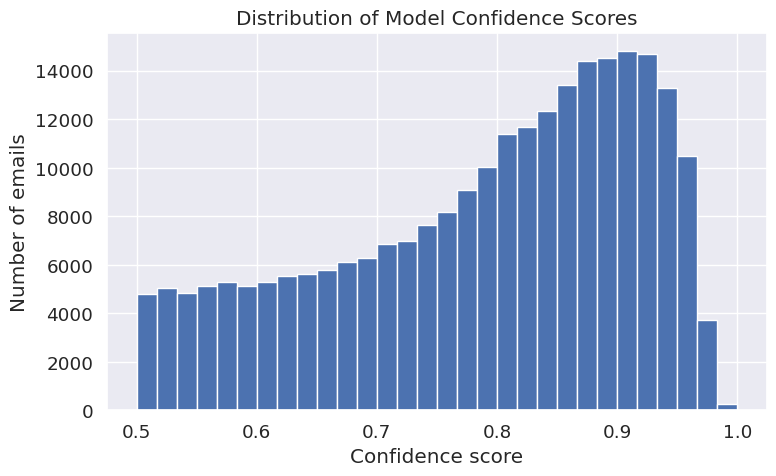

In [197]:
plt.figure(figsize=(8, 5))
plt.hist(thread_df["confidence"], bins=30)
plt.xlabel("Confidence score")
plt.ylabel("Number of emails")
plt.title("Distribution of Model Confidence Scores")
plt.tight_layout()
plt.show()

In [198]:
thread_df_filter = thread_df[(thread_df['prediction'] == 0) & (thread_df['confidence'] >= 0.9)]
thread_df_filter

,thread_id,subject,n_messages,avg_confidence,majority_pred,chain_text,prediction,confidence
3,<10000392.1075856574818.JavaMail.evans@thyme>,telerate service,1,0.813824,0,---\nDATE: 2001-03-29 03:00:00-08:00\nFROM: sh...,0,0.951799
4,<10000461.1075841331186.JavaMail.evans@thyme>,how's business?,1,0.884976,0,---\nDATE: 2001-03-26 14:08:00-08:00\nFROM: pa...,0,0.970800
9,<1000115.1075852075775.JavaMail.evans@thyme>,natural gas origination,1,0.859819,0,---\nDATE: 2001-10-25 05:29:33-07:00\nFROM: ba...,0,0.916306
12,<10001276.1075862177804.JavaMail.evans@thyme>,east gas hierarchy structure,1,0.870000,0,---\nDATE: 2001-11-08 08:49:34-08:00\nFROM: m....,0,0.923041
13,<1000142.1075852789603.JavaMail.evans@thyme>,pjm day ahead product,1,0.930706,0,---\nDATE: 2001-07-19 06:09:48-07:00\nFROM: pe...,0,0.953918
...,...,...,...,...,...,...,...,...
248557,<999301.1075841388655.JavaMail.evans@thyme>,nng nominations - april 1992,1,0.864109,0,---\nDATE: 2002-03-27 08:24:21-08:00\nFROM: tr...,0,0.927176
248558,<9993663.1075853018712.JavaMail.evans@thyme>,mgu,1,0.814596,0,---\nDATE: 2001-10-08 15:35:50-07:00\nFROM: lo...,0,0.904899
248569,<9996943.1075840792147.JavaMail.evans@thyme>,energy derivatives/electric power seminars,1,0.925809,0,---\nDATE: 2002-01-08 09:12:02-08:00\nFROM: j....,0,0.935977
248575,<9997840.1075855090890.JavaMail.evans@thyme>,here is a sample of the spreadsheet,1,0.881382,0,---\nDATE: 2001-10-15 13:49:31-07:00\nFROM: m....,0,0.918509


In [186]:
thread_df_filter.chain_text.iloc[0]

'---\nDATE: 2001-03-29 03:00:00-08:00\nFROM: shirley.crenshaw@enron.com\nTO: vince.kaminski@enron.com, stinson.gibner@enron.com, pinnamaneni.krishnarao@enron.com, vasant.shanbhogue@enron.com, mike.roberts@enron.com, joseph.hrgovcic@enron.com, tanya.tamarchenko@enron.com, zimin.lu@enron.com, martin.lin@enron.com, maureen.raymond@enron.com, osman.sezgen@enron.com, paulo.issler@enron.com, amitava.dhar@enron.com, alex.huang@enron.com, kevin.moore@enron.com, william.smith@enron.com, jose.marquez@enron.com, chonawee.supatgiat@enron.com, shalesh.ganjoo@enron.com, tom.halliburton@enron.com, elena.chilkina@enron.com, sevil.yaman@enron.com, sofya.tamarchenko@enron.com, bob.lee@enron.com, gwyn.koepke@enron.com, hector.campos@enron.com, anita.dupont@enron.com, youyi.feng@enron.com, praveen.mellacheruvu@enron.com, stephen.bennett@enron.com, roman.zadorozhny@enron.com, lance.cunningham@enron.com, leann.walton@enron.com, shane.green@enron.com, seksan.kiatsupaibul@enron.com, kate.lucas@enron.com, nels

In [184]:
import re
email_pattern = r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
list_of_emails = []
for _, row in thread_df_filter.iterrows():
    emails = re.findall(email_pattern, row['chain_text'])
    emails_unique = sorted(set(e.lower() for e in emails))
    list_of_emails.append(emails_unique)


In [187]:
thread_df_filter['email'] = list_of_emails

/tmp/ipykernel_34/1378682830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thread_df_filter['email'] = list_of_emails


In [ ]:
print(len(thread_df_filter['chain_text'].unique()))

In [ ]:
print(thread_df_filter['chain_text'].iloc[30])

In [189]:
thread_df_filter.to_csv("/kaggle/working/enron_filter_final_df.csv", index = False)

In [136]:
df2.to_csv("/kaggle/working/parse_email_final.csv", index = False)